# Weighted regression of global temperature data

The goal is to come up with a predictive model for temperatures based on data from 
https://datahub.io/core/global-temp



In [234]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd


### Download the data

In [235]:
data = pd.read_csv("Temperature.csv")
data.head()


,Unnamed: 0,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,...,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON,var
0,0,1880,-0.17,-0.23,-0.08,-0.15,-0.08,-0.20,-0.17,-0.09,...,-0.22,-0.21,-0.17,-0.16,***,***,-0.10,-0.15,-0.19,5.0
1,1,1881,-0.19,-0.13,0.04,0.06,0.07,-0.17,0.02,-0.02,...,-0.2,-0.17,-0.05,-0.07,-0.08,-0.16,0.06,-0.06,-0.17,5.0
2,2,1882,0.18,0.15,0.06,-0.15,-0.13,-0.22,-0.15,-0.06,...,-0.23,-0.15,-0.35,-0.1,-0.07,0.09,-0.08,-0.14,-0.17,5.0
3,3,1883,-0.28,-0.36,-0.12,-0.17,-0.16,-0.07,-0.05,-0.13,...,-0.11,-0.22,-0.11,-0.16,-0.18,-0.33,-0.15,-0.08,-0.18,5.0
4,4,1884,-0.13,-0.08,-0.36,-0.40,-0.34,-0.34,-0.32,-0.27,...,-0.24,-0.32,-0.3,-0.28,-0.26,-0.1,-0.36,-0.31,-0.28,5.0


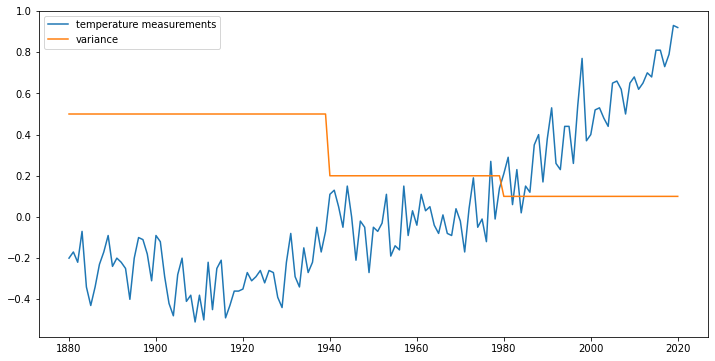

In [236]:
names = data.columns
t = data['Year']
y = data['Jun']
var = (data['var'])
fig = plt.figure(figsize=[12,6])
s=plt.plot(t,y,label='temperature measurements')
s=plt.plot(t,0.1*var,label='variance')
s = plt.legend()


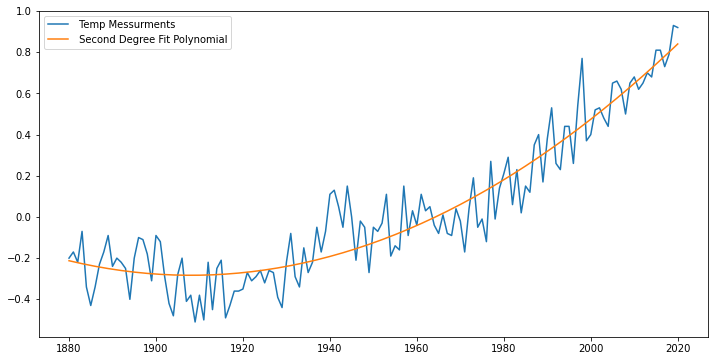

In [237]:
# 1.A
# 1/2
fitData2 = np.polyfit(t, y, 2)
fig = plt.figure(figsize=[12,6])
s = plt.plot(t,y, label=' Temp Messurments')
s = plt.plot(t, np.polyval(fitData2, t),label=' Second Degree Fit Polynomial')
s = plt.legend()

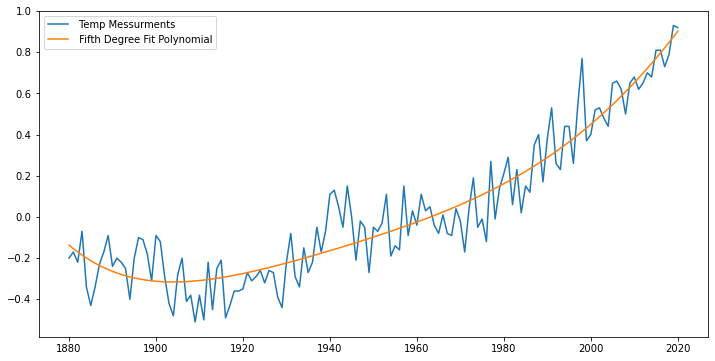

In [238]:
# 1.A
# 2/2
fitData5 = np.polyfit(t, y, 5)
fig = plt.figure(figsize=[12,6])
s = plt.plot(t,y, label=' Temp Messurments')
s = plt.plot(t, np.polyval(fitData5, t),label=' Fifth Degree Fit Polynomial')
s = plt.legend()

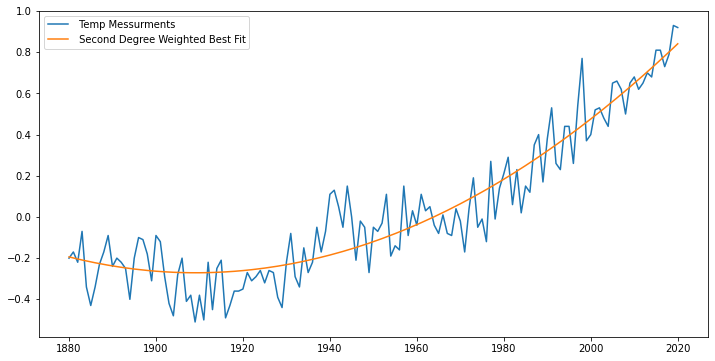

In [239]:
# 1.C
# 1/4
w_2 = np.reciprocal(var)
w_2 = np.diag(w_2)
x_t = np.vstack((np.ones((1,141)), t, np.power(t,2)))
x = np.transpose(x_t)

inverse_stuff = np.linalg.inv(np.matmul(np.matmul(x_t, w_2), x))
right_side = np.matmul(np.matmul(x_t, w_2),y)
theta = np.matmul(inverse_stuff, right_side)
w_p2 = np.matmul(x, theta)

fig = plt.figure(figsize=[12,6])
s = plt.plot(t, y, label=' Temp Messurments')
s = plt.plot(t, w_p2, label=' Second Degree Weighted Best Fit')
s = plt.legend()

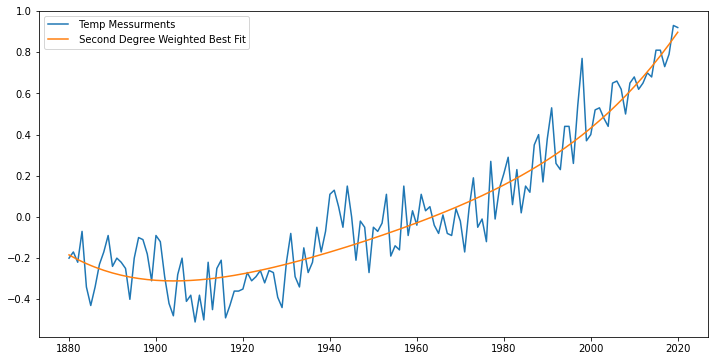

In [240]:
# 1.C
# 2/4
w_2 = np.reciprocal(var)
w_2 = np.diag(w_2)
x_t = np.vstack((np.ones((1,141)), t, np.power(t,2), np.power(t,3), np.power(t,4), np.power(t,5)))
x = np.transpose(x_t)

inverse_stuff = np.linalg.inv(np.matmul(np.matmul(x_t, w_2), x))
right_side = np.matmul(np.matmul(x_t, w_2),y)
theta = np.matmul(inverse_stuff, right_side)
w_p5 = np.matmul(x, theta)

fig = plt.figure(figsize=[12,6])
s = plt.plot(t, y, label=' Temp Messurments')
s = plt.plot(t, w_p5, label=' Second Degree Weighted Best Fit')
s = plt.legend()

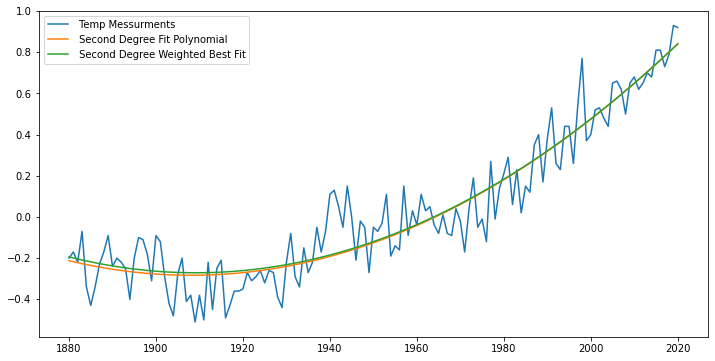

In [241]:
# 1.C
# 3/4
fig = plt.figure(figsize=[12,6])
s = plt.plot(t, y, label=' Temp Messurments')
s = plt.plot(t, np.polyval(fitData2, t),label=' Second Degree Fit Polynomial')
s = plt.plot(t, w_p2, label=' Second Degree Weighted Best Fit')
s = plt.legend()

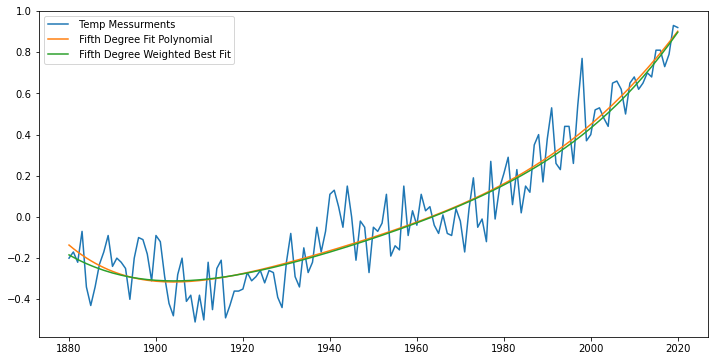

In [242]:
# 1.C
# 4/4
fig = plt.figure(figsize=[12,6])
s = plt.plot(t, y, label=' Temp Messurments')
s = plt.plot(t, np.polyval(fitData5, t),label=' Fifth Degree Fit Polynomial')
s = plt.plot(t, w_p5, label=' Fifth Degree Weighted Best Fit')
s = plt.legend()

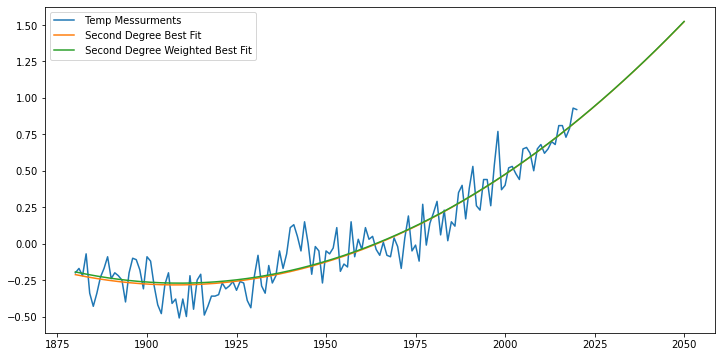

In [243]:
# 1.D
# 1/2
extension = pd.Series(range(2021,2051))
extendedT = t.append(extension)
resultsNW = np.polyfit(t,y,2)
w_2 = np.reciprocal(var)
w_2 = np.diag(w_2)
x_t = np.vstack((np.ones((1,141)), t, np.power(t,2)))
x = np.transpose(x_t)
inverse_stuff = np.linalg.inv(np.matmul(np.matmul(x_t, w_2), x))
right_side = np.matmul(np.matmul(x_t, w_2),y)
theta = np.matmul(inverse_stuff, right_side)
w_p2 = np.matmul(x, theta)
extendedT = pd.Series.to_numpy(extendedT)
x_t = np.vstack((np.ones((1,171)), extendedT, np.power(extendedT,2)))
x = np.transpose(x_t)
resultsWW = np.matmul(x,theta)
fig = plt.figure(figsize=[12,6])
s = plt.plot(t, y, label=' Temp Messurments')
s = plt.plot(extendedT, np.polyval(resultsNW, extendedT), label=' Second Degree Best Fit')
s = plt.plot(extendedT, resultsWW, label=' Second Degree Weighted Best Fit')
s = plt.legend()

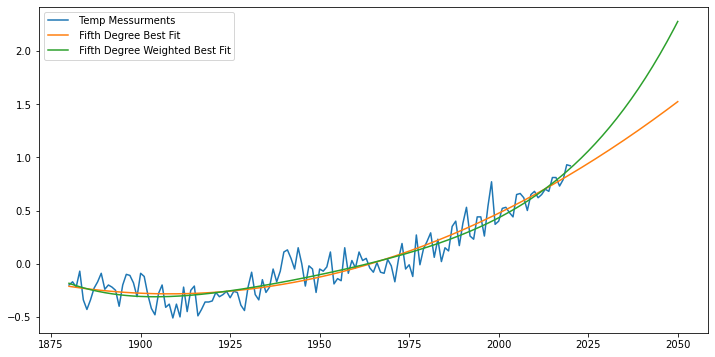

In [244]:
# 1.D
# 2/2
extension = pd.Series(range(2021,2051))
extendedT = t.append(extension)
resultsNW = np.polyfit(t,y,2)
w_2 = np.reciprocal(var)
w_2 = np.diag(w_2)
x_t = np.vstack((np.ones((1,141)), t, np.power(t,2), np.power(t,3), np.power(t,4), np.power(t,5)))
x = np.transpose(x_t)
inverse_stuff = np.linalg.inv(np.matmul(np.matmul(x_t, w_2), x))
right_side = np.matmul(np.matmul(x_t, w_2),y)
theta = np.matmul(inverse_stuff, right_side)
w_p2 = np.matmul(x, theta)
extendedT = pd.Series.to_numpy(extendedT)
x_t = np.vstack((np.ones((1,171)), extendedT, np.power(extendedT,2), np.power(extendedT,3), np.power(extendedT,4),np.power(extendedT,5)))
x = np.transpose(x_t)
resultsWW = np.matmul(x,theta)
fig = plt.figure(figsize=[12,6])
s = plt.plot(t, y, label=' Temp Messurments')
s = plt.plot(extendedT, np.polyval(resultsNW, extendedT), label=' Fifth Degree Best Fit')
s = plt.plot(extendedT, resultsWW, label=' Fifth Degree Weighted Best Fit')
s = plt.legend()

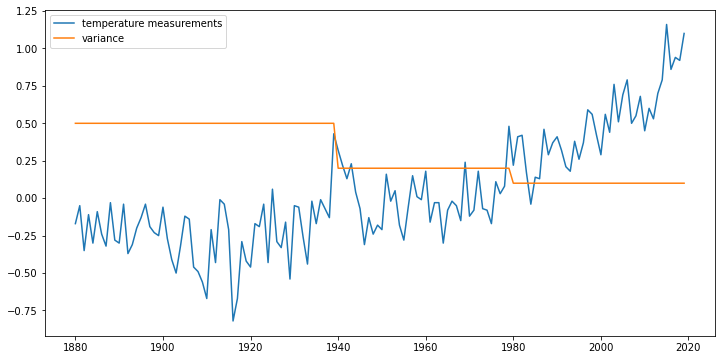

In [245]:
# 1.E
# -1.*
# 1/9
data2 = pd.read_csv("Temperature.csv", skipfooter=1)
names = data.columns
t = data2['Year']
y = data2['Dec']
var = (data2['var'])
fig = plt.figure(figsize=[12,6])
s=plt.plot(t,y,label='temperature measurements')
s=plt.plot(t,0.1*var,label='variance')
s = plt.legend()

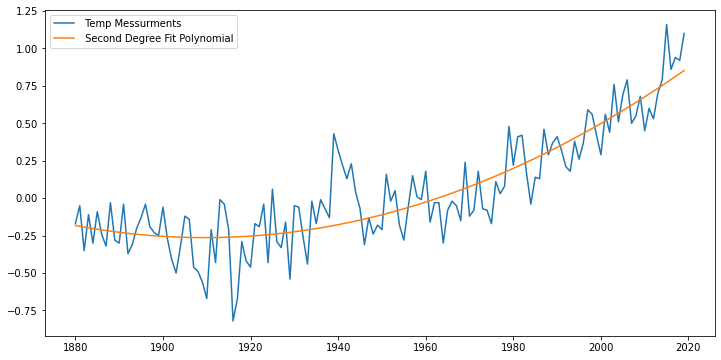

In [246]:
# 1.E
# -1.A
# 2/9
fitData2 = np.polyfit(t, y, 2)
fig = plt.figure(figsize=[12,6])
s = plt.plot(t,y, label=' Temp Messurments')
s = plt.plot(t, np.polyval(fitData2, t),label=' Second Degree Fit Polynomial')
s = plt.legend()

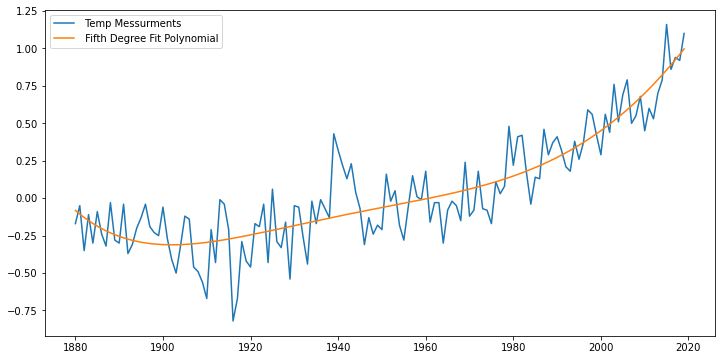

In [247]:
# 1.E
# -1.A
# 3/9
fitData5 = np.polyfit(t, y, 5)
fig = plt.figure(figsize=[12,6])
s = plt.plot(t,y, label=' Temp Messurments')
s = plt.plot(t, np.polyval(fitData5, t),label=' Fifth Degree Fit Polynomial')
s = plt.legend()

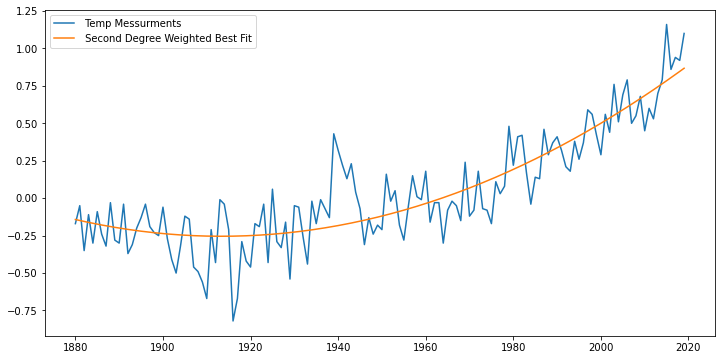

In [248]:
# 1.E
# -1.C
# 4/9
w_2 = np.reciprocal(var)
w_2 = np.diag(w_2)
x_t = np.vstack((np.ones((1,140)), t, np.power(t,2)))
x = np.transpose(x_t)

inverse_stuff = np.linalg.inv(np.matmul(np.matmul(x_t, w_2), x))
right_side = np.matmul(np.matmul(x_t, w_2),y)
theta = np.matmul(inverse_stuff, right_side)
w_p2 = np.matmul(x, theta)

fig = plt.figure(figsize=[12,6])
s = plt.plot(t, y, label=' Temp Messurments')
s = plt.plot(t, w_p2, label=' Second Degree Weighted Best Fit')
s = plt.legend()

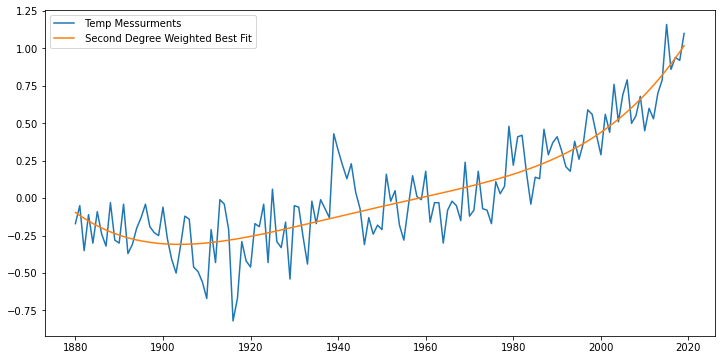

In [249]:
# 1.E
# -1.C
# 5/9
w_2 = np.reciprocal(var)
w_2 = np.diag(w_2)
x_t = np.vstack((np.ones((1,140)), t, np.power(t,2), np.power(t,3), np.power(t,4), np.power(t,5)))
x = np.transpose(x_t)

inverse_stuff = np.linalg.inv(np.matmul(np.matmul(x_t, w_2), x))
right_side = np.matmul(np.matmul(x_t, w_2),y)
theta = np.matmul(inverse_stuff, right_side)
w_p5 = np.matmul(x, theta)

fig = plt.figure(figsize=[12,6])
s = plt.plot(t, y, label=' Temp Messurments')
s = plt.plot(t, w_p5, label=' Second Degree Weighted Best Fit')
s = plt.legend()

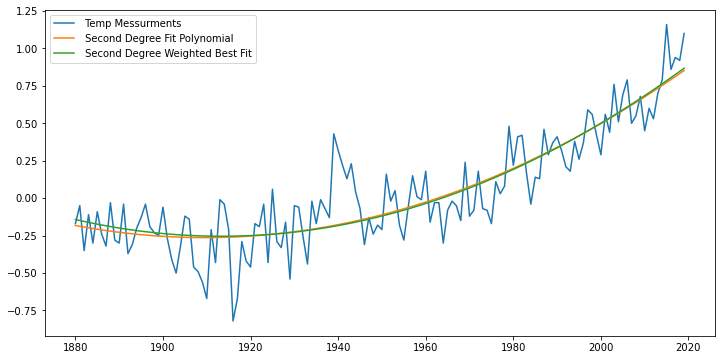

In [250]:
# 1.E
# -1.C
# 6/9
fig = plt.figure(figsize=[12,6])
s = plt.plot(t, y, label=' Temp Messurments')
s = plt.plot(t, np.polyval(fitData2, t),label=' Second Degree Fit Polynomial')
s = plt.plot(t, w_p2, label=' Second Degree Weighted Best Fit')
s = plt.legend()

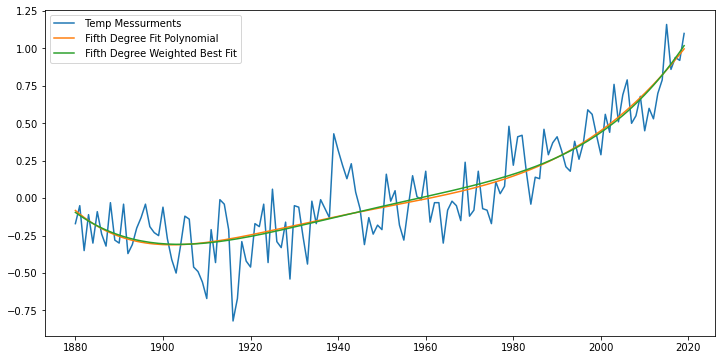

In [251]:
# 1.E
# -1.C
# 7/9
fig = plt.figure(figsize=[12,6])
s = plt.plot(t, y, label=' Temp Messurments')
s = plt.plot(t, np.polyval(fitData5, t),label=' Fifth Degree Fit Polynomial')
s = plt.plot(t, w_p5, label=' Fifth Degree Weighted Best Fit')
s = plt.legend()

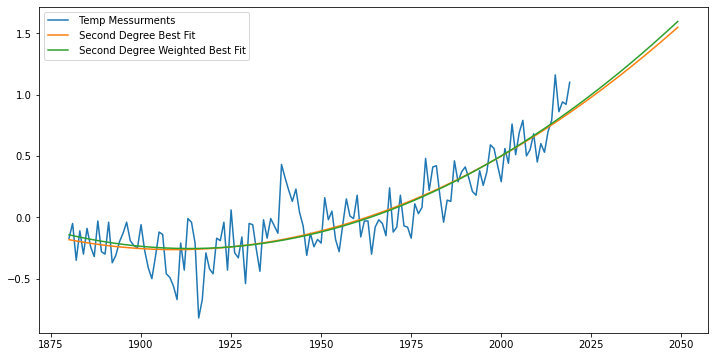

In [252]:
# 1.E
# -1.D
# 8/9
extension = pd.Series(range(2020,2050))
extendedT = t.append(extension)
resultsNW = np.polyfit(t,y,2)
w_2 = np.reciprocal(var)
w_2 = np.diag(w_2)
x_t = np.vstack((np.ones((1,140)), t, np.power(t,2)))
x = np.transpose(x_t)
inverse_stuff = np.linalg.inv(np.matmul(np.matmul(x_t, w_2), x))
right_side = np.matmul(np.matmul(x_t, w_2),y)
theta = np.matmul(inverse_stuff, right_side)
w_p2 = np.matmul(x, theta)
extendedT = pd.Series.to_numpy(extendedT)
x_t = np.vstack((np.ones((1,170)), extendedT, np.power(extendedT,2)))
x = np.transpose(x_t)
resultsWW = np.matmul(x,theta)
fig = plt.figure(figsize=[12,6])
s = plt.plot(t, y, label=' Temp Messurments')
s = plt.plot(extendedT, np.polyval(resultsNW, extendedT), label=' Second Degree Best Fit')
s = plt.plot(extendedT, resultsWW, label=' Second Degree Weighted Best Fit')
s = plt.legend()

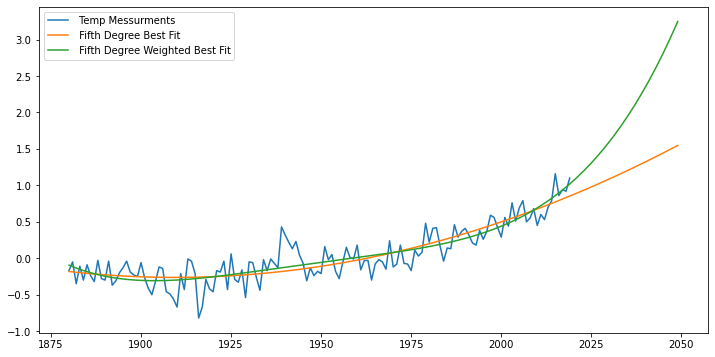

In [253]:
# 1.E
# -1.D
# 9/9
extension = pd.Series(range(2020,2050))
extendedT = t.append(extension)
resultsNW = np.polyfit(t,y,2)
w_2 = np.reciprocal(var)
w_2 = np.diag(w_2)
x_t = np.vstack((np.ones((1,140)), t, np.power(t,2), np.power(t,3), np.power(t,4), np.power(t,5)))
x = np.transpose(x_t)
inverse_stuff = np.linalg.inv(np.matmul(np.matmul(x_t, w_2), x))
right_side = np.matmul(np.matmul(x_t, w_2),y)
theta = np.matmul(inverse_stuff, right_side)
w_p2 = np.matmul(x, theta)
extendedT = pd.Series.to_numpy(extendedT)
x_t = np.vstack((np.ones((1,170)), extendedT, np.power(extendedT,2), np.power(extendedT,3), np.power(extendedT,4),np.power(extendedT,5)))
x = np.transpose(x_t)
resultsWW = np.matmul(x,theta)
fig = plt.figure(figsize=[12,6])
s = plt.plot(t, y, label=' Temp Messurments')
s = plt.plot(extendedT, np.polyval(resultsNW, extendedT), label=' Fifth Degree Best Fit')
s = plt.plot(extendedT, resultsWW, label=' Fifth Degree Weighted Best Fit')
s = plt.legend()